# **Proyecto productora "1Space" para Youtube**

youtube es una red social actualmente de google que busca como fin crear una comunidad donde compartir videos y opiniones sobre diversos temas.
La productora "1Space" una productora. busca introducirce dentro de este mundo, para eso antes de generar un presupuesto y contratar personal para la escritura,grabacion, edicion e influencers. Como primer etapa, ven necesario realizar un estudio sobre las tendencias y diferentes tematicas populares dentro de la plataforma. Para dar solucion a esto se decidieron plantear las siguientes preguntas


# Preguntas de interes


*   ¿En que nos concentramos mas, Visitas o subcriptores?
*   ¿Que tematicas generan mas visitas?
*   ¿las visitas altas generan subscriptores?
*   Para aumemntar la cantidad de subscriptores¿Buscamos cantidad o calidad?
*   ¿Sobre que tematicas moldeamos nuestro contenido?










In [ ]:
import pandas as pd ## Pandas: https://pandas.pydata.org/docs/
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score # metricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import plotly.express as px
from google.colab import files
#uploaded = files.upload() # para cargar archivos desde la pc a colab
import io


In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
print(os.getcwd())
os.chdir("/content/gdrive/My Drive")

Mounted at /content/gdrive
/content


In [ ]:
#creo una tabla con la info del excel para facilitar algunas busquedas en caso de no encontrar la solucion con pandas

import sqlite3

# Leer el archivo XLSX
df = pd.read_excel('/content/gdrive/MyDrive/Global YouTube Statistics modificado.xlsx')

# Conectar a la base de datos SQLite (se creará un nuevo archivo si no existe)
conn = sqlite3.connect('youtube_stats.db')
cursor = conn.cursor()

# Crear la tabla en SQLite (si no existe)
cursor.execute('''
CREATE TABLE IF NOT EXISTS youtube_Global(
y_rank int,
Youtuber varchar(40),
subscribers int,
video_views int,
category varchar(50),
Title varchar(50),
uploads int,
country varchar(20),
Abbreviation varchar(5),
channel_type varchar(30),
video_views_rank int,
country_rank int,
channel_type_rank int,
video_views_for_the_last_30_days int,
lowest_monthly_earnings int,
highest_monthly_earnings int,
lowest_yearly_earnings int,
highest_yearly_earnings int,
subscribers_for_last_30_days int,
created_year varchar(4),
created_month varchar(5),
created_date varchar(2)
)

''')

# Insertar los datos del DataFrame en la tabla
df.to_sql('youtube_stats', conn, if_exists='append', index=False)

# Confirmar los cambios y cerrar la conexión
conn.commit()
conn.close()


In [ ]:
df2 = pd.read_excel('/content/gdrive/MyDrive/Global YouTube Statistics.xlsx')
df2.head(3)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,991,Natan por Aï¿,12300000,9029609749,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
1,992,Free Fire India Official,12300000,1674409945,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,993,Panda,12300000,2214684303,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    int64  
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [ ]:
df2.count()

,0
rank,995
Youtuber,995
subscribers,995
video views,995
category,949
Title,995
uploads,995
Country,873
Abbreviation,873
channel_type,965


<Axes: >

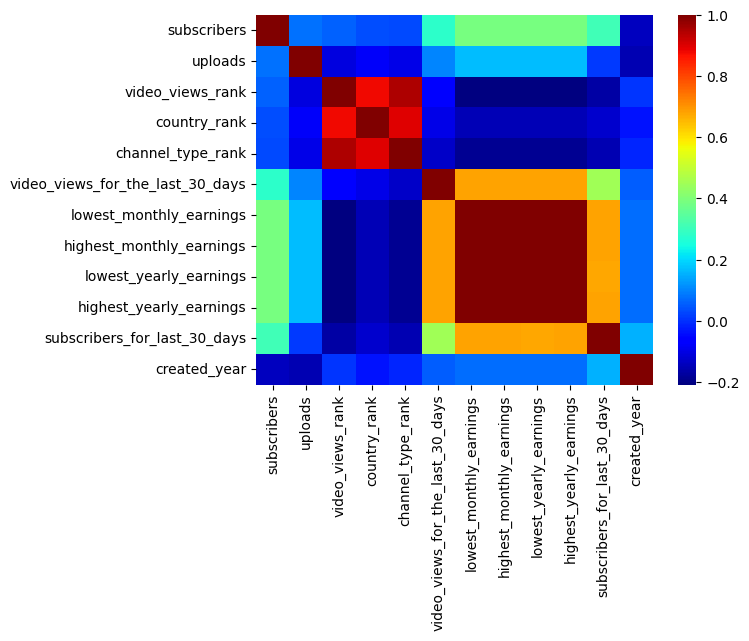

In [ ]:
conn = sqlite3.connect('youtube_stats.db')
query_para_heat = "select subscribers, uploads ,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year from youtube_stats"
df3 = pd.read_sql_query(query_para_heat, conn)
sns.heatmap(df3.corr(), cmap='jet')

# Comprendiendo la comunidad

Desde su creacion youtube fue evolucionando hasta ser lo que es ahora. Logrando asi que las posibilidades de tener un canal de youtube exitoso sea cada vez mas dificil. entonces ¿que cosas deberiamos tener en cuenta?

para responder esto tomaremos en cuenta la info recolectada del año 2024.

**Distribución**

Mirando la distribucion de canales creados por pais podemos notar que los paises que mas cantidad de canales creados poseen son Estados Unidos e India

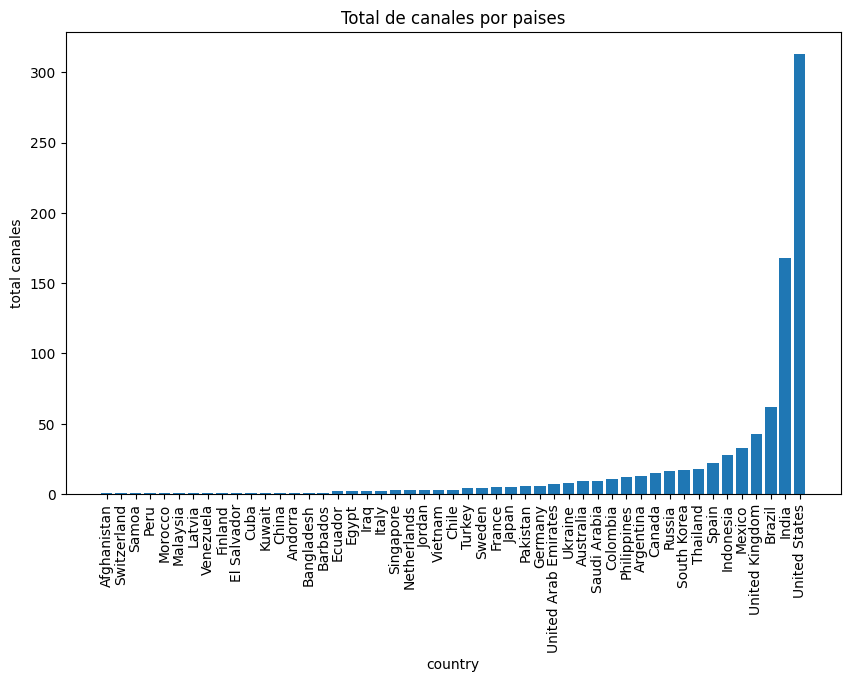

In [ ]:
#agrupo juegos segun su fecha
total_paises = df2.groupby(['Country']).size().sort_values()

#creo figura
fig, ax = plt.subplots(figsize=(10, 6))
#tomo como index los años + las sumas de sus valores
ax.bar(total_paises.index, total_paises.values)
ax.set_title('Total de canales por paises')
ax.set_ylabel('total canales')
ax.set_xlabel('country')

# Rotamos las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=90)

# Muestra la gráfica
plt.show()

# Distribucion por año de canales populares

podemos notar que hay una gran cantidad de canales populares, la cantidad de estos disminuyo bastante en comparacion al año 2024. Teniendo un pico de youtubers en los años 2015 y 2016.

<Axes: xlabel='created_year'>

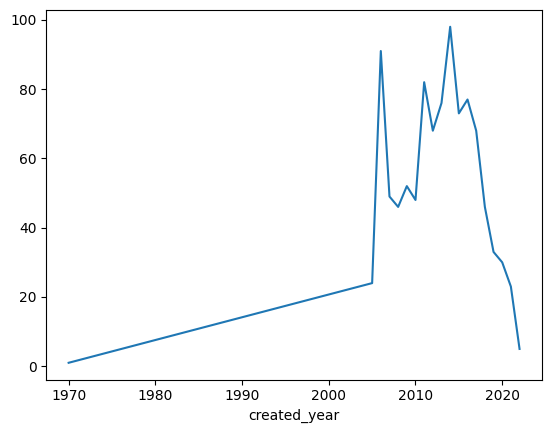

In [ ]:
#Agrupe canales creados historicamente

Canales_creados_hist =  df2.groupby('created_year')['Youtuber'].count()
Canales_creados_hist.plot.line()

pero, **¿La antiguedad de canal asegura mas visitas?**
en este grafico podemos ver que los canales tienen una media presentada como una linea roja, los canales (separados por años) no se alejan mucho de la media,teniendo 2005,2008 y 2020 como los valores mas cerca de la media. Si notamos que en los canales creados en el 2006 tenemos muchos valores atipicos.

<function matplotlib.pyplot.show(close=None, block=None)>

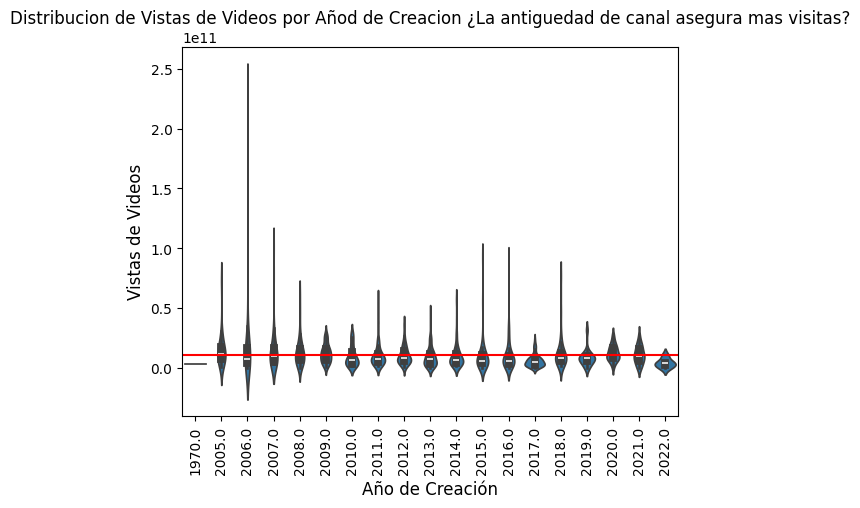

In [ ]:
sns.violinplot(x='created_year', y='video views', data=df2)
plt.axhline(df2['video views'].mean(), color='red', linestyle='-', label='Media')
plt.title("Distribucion de Vistas de Videos por Añod de Creacion ¿La antiguedad de canal asegura mas visitas?")
plt.xlabel("Año de Creación", fontsize=12)
plt.ylabel("Vistas de Videos", fontsize=12)
plt.xticks(rotation=90)
plt.show

# Deberia crear mi canal teniendo en cuenta la categoria mas popular en la actualidad?

teniendo en cuenta el grafico podemos notar que hay 3 categorias donde la cantidad de subscriptores es muy alta

*   Entretenimiento
*   Musica
*   Blogs




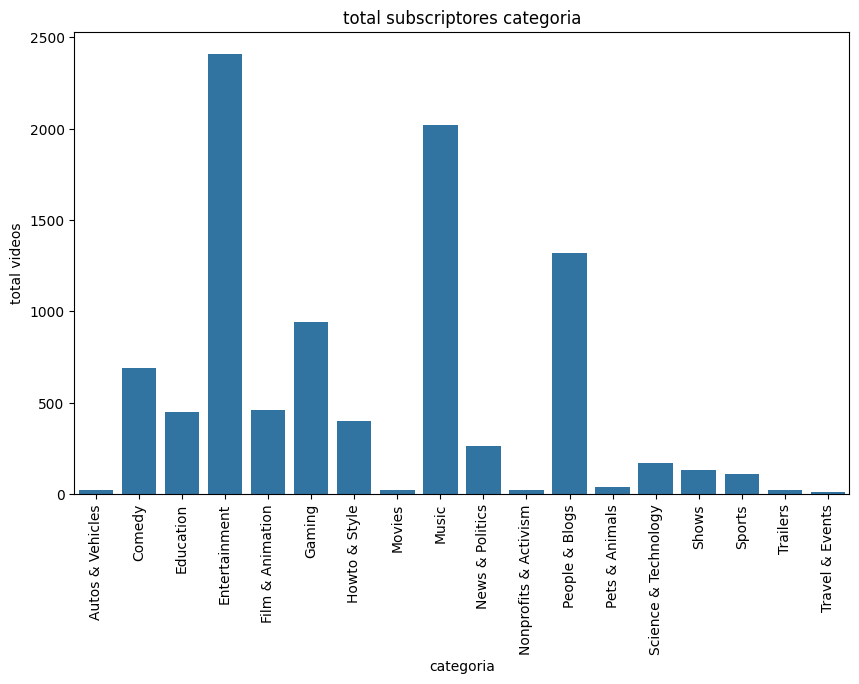

In [ ]:
conn = sqlite3.connect('youtube_stats.db')
query = "select count(subscribers) AS cantidad_subs, category  from youtube_stats  group by category"
df = pd.read_sql_query(query, conn)
conn.close()


plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='cantidad_subs', data=df)
plt.title('total subscriptores categoria')
plt.xlabel('categoria')
plt.ylabel('total videos')
plt.xticks(rotation=90)





plt.show()

Podemos notar que las visitas medias de los canales de las tematicas mas populares manejan una media de visitas mensuales muy altas, teniendo en cuenta


*   Musica 90 M
*   Entretenimiento 59 M
*   Blogs 48 M




In [ ]:
import plotly.express as px
filtrado_top_3 = df2[df2['category'].isin(['Entertainment', 'Music', 'People & Blogs'])]
fig = px.box(filtrado_top_3, x='category', y='video_views_for_the_last_30_days',
             title='Boxplot de Vistas de Video por Categoría')
fig.show()

# Las Visitas Generan Subscripciones?
Podemos observar que entre las visitas generadas en los ultimos 30 dias no posee correlacion con la cantidad de subscriptores.

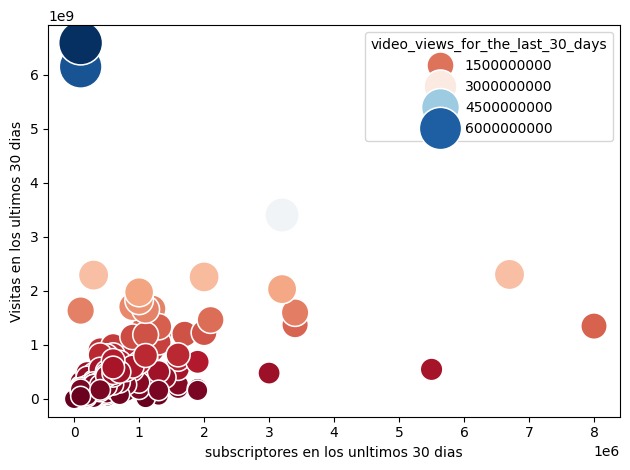

In [ ]:
steam_scatterplot = df2[['video_views_for_the_last_30_days','subscribers_for_last_30_days']]

sizes = steam_scatterplot ['video_views_for_the_last_30_days'] * 1

scatterplot = steam_scatterplot


# customize the scatter plot


sns.scatterplot(x=steam_scatterplot['subscribers_for_last_30_days'], y=steam_scatterplot['video_views_for_the_last_30_days'], hue='video_views_for_the_last_30_days', size=sizes, sizes=(200, 1000), data=steam_scatterplot, palette = 'RdBu')


# add labels and title

plt.xlabel("subscriptores en los unltimos 30 dias")

plt.ylabel("Visitas en los ultimos 30 dias")

plt.title("")



# display the plot
plt.tight_layout()
plt.show()

Aun asi esto no cambia en relacion a las ganancias por visitas

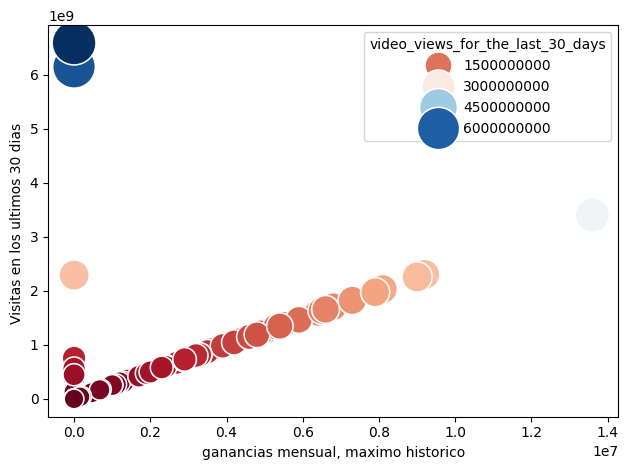

In [ ]:
yt_scatterplot = df2[['video_views_for_the_last_30_days','highest_monthly_earnings']]
#generos_2020_2023_t = steam_2020_2023_t['Genres'].str.split(',', expand=True).stack().value_counts()
#steam_2020_2023_t['num_genres'] = steam_2020_2023_t['Genres'].str.split(',').apply(len)
sizes = yt_scatterplot ['video_views_for_the_last_30_days'] * 1

scatterplot = yt_scatterplot


# customize the scatter plot


sns.scatterplot(x=yt_scatterplot['highest_monthly_earnings'], y=yt_scatterplot['video_views_for_the_last_30_days'], hue='video_views_for_the_last_30_days', size=sizes, sizes=(200, 1000), data=yt_scatterplot, palette = 'RdBu')


# add labels and title

plt.xlabel("ganancias mensual, maximo historico")

plt.ylabel("Visitas en los ultimos 30 dias ")

plt.title("")



# display the plot
plt.tight_layout()
plt.show()

# Evaluo metricas


Teniendo en centa que los resultados de la exploracion de datos nos muesra que las visias generan mas ganancias que los subscriptores. Debido a esto se decidio entrenar nuestro Dataset enfocados en la cantidad de visitas.

Para eso
Eliminamos los NA y le agrego etiquertas boolean creando dummies para comenzar a realizar valdaciones sobre el data frame

*   Eliminando los nulos
*   Generando dummies
*   Instanciar los modelos



In [ ]:
# 1. Eliminar filas con valores NaN de df2
data = df2.dropna()

# 2. Eliminar columnas no necesarias
data = data.drop(columns=['Abbreviation', 'created_year', 'created_month', 'created_date', 'Population', 'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude', 'country_rank'])

# 3. Convertir variables categóricas en variables dummy (si hay alguna)
data = pd.get_dummies(data, drop_first=True)

data

,rank,subscribers,video views,uploads,video_views_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,...,channel_type_Entertainment,channel_type_Film,channel_type_Games,channel_type_Howto,channel_type_Music,channel_type_News,channel_type_Nonprofit,channel_type_People,channel_type_Sports,channel_type_Tech
0,991,12300000,9029609749,1200,525.0,172.0,5.525130e+08,138100.0,2200000.0,1700000.0,...,True,False,False,False,False,False,False,False,False,False
1,992,12300000,1674409945,1500,6141.0,69.0,6.473500e+07,16200.0,258900.0,194200.0,...,False,False,True,False,False,False,False,False,False,False
3,994,12300000,374123483,39,35112.0,69.0,3.871000e+06,968.0,15500.0,11600.0,...,False,False,True,False,False,False,False,False,False,False
4,995,12300000,2129773714,62,4568.0,44.0,2.400000e+07,6000.0,96000.0,72000.0,...,False,False,False,False,False,False,False,False,False,False
5,971,12400000,7597013023,398,720.0,43.0,9.036720e+08,225900.0,3600000.0,2700000.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,9,106000000,90479060027,493,630.0,25.0,4.894700e+07,12200.0,195800.0,146800.0,...,False,False,False,False,False,False,False,True,False,False
990,5,159000000,148000000000,116536,3.0,2.0,1.824000e+09,455900.0,7300000.0,5500000.0,...,True,False,False,False,False,False,False,False,False,False
991,4,162000000,164000000000,966,2.0,1.0,1.975000e+09,493800.0,7900000.0,5900000.0,...,False,False,False,False,False,False,False,False,False,False
992,3,166000000,28368841870,741,48.0,1.0,1.348000e+09,337000.0,5400000.0,4000000.0,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
# 4. Definir X (variables independientes) e y (variable dependiente)
x = data.drop('video views', axis=1)
y = data['video views']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Training set shape: (443, 1186), Test set shape: (111, 1186)


In [ ]:
# 3. Instanciar los modelos
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Inicializar diccionarios para almacenar los resultados
metrics = {
    'Model': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R2': [],
    'Adjusted R2': []
}




In [ ]:

# Definir función para calcular R² ajustado
def adjusted_r2(r2, X, y):
    n = len(y)
    p = X.shape[1]
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [ ]:
# 4. Entrenar los modelos y calcular las métricas
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    r2_adj = adjusted_r2(r2, X_test, y_test)

    # Guardar los resultados
    metrics['Model'].append(name)
    metrics['MSE'].append(mse)
    metrics['RMSE'].append(rmse)
    metrics['MAE'].append(mae)
    metrics['R2'].append(r2)
    metrics['Adjusted R2'].append(r2_adj)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Teniendo en cuenta los resultados de las metricas podemos notar que el algoritmo Linear Regression y Ridge Regression poseen los mejores valores  

In [ ]:
results = pd.DataFrame(metrics)
results

,Model,MSE,RMSE,MAE,R2,Adjusted R2
0,Linear Regression,4.112021e+19,6.412504e+09,4.290969e+09,0.879552,1.012313
1,Ridge Regression,4.053900e+19,6.367025e+09,4.182286e+09,0.881254,1.012139
2,Decision Tree,8.420164e+19,9.176145e+09,1.755692e+09,0.753359,1.025214
3,Random Forest,6.470257e+19,8.043791e+09,1.444080e+09,0.810475,1.019375


# Linear Regresion

Teniendo en cuenta el resultatdo de las metricas de los modelos comenzaremos por este

Mean Squared Error: 4.112021210130691e+19
R^2 Score: 0.8795518682784564


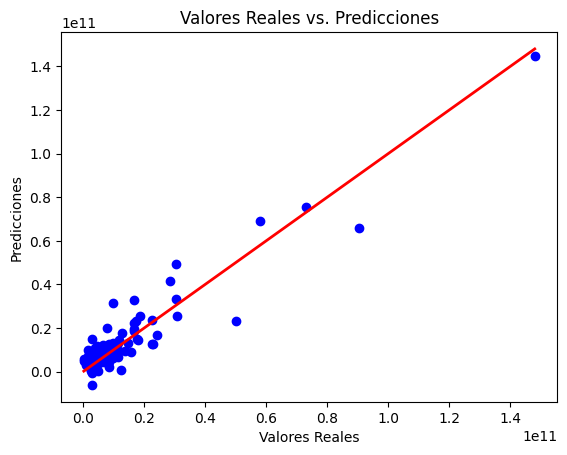

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Línea de referencia
plt.show()


En el gráfico, cada punto azul representa un par de valores: los valores reales (y_test) en el eje x y las predicciones (y_pred) en el eje y.La línea roja es la línea de referencia perfecta (diagonal de identidad), donde los valores predichos coincidirían exactamente con los valores reales.Varios puntos están dispersos lejos de la línea de referencia, especialmente a valores altos de y_test y y_pred, lo que indica que el modelo tiene dificultades para predecir correctamente en esos rangos.


Ademas:


*   El coeficiente R2 posee un 88% de variabilidad lo cual es un buen valor

**pero**:
*   El MSE es bastante alto



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


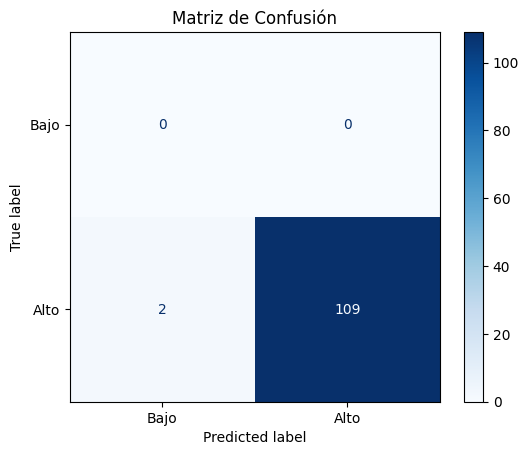

Matriz de Confusión:
[[42 13]
 [ 9 47]]


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import confusion_matrix
import numpy as np

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_ridge = ridge_model.predict(X_test)

# Definir un umbral para convertir en categorías (esto es un ejemplo; ajusta según tu caso)
threshold = np.median(y_test)  # Usar la mediana de los valores reales como umbral

# Convertir valores continuos en categorías (por ejemplo: "bajo" y "alto")
y_test_class = np.where(y_test >= threshold, "alto", "bajo")
y_pred_class = np.where(y_pred_ridge >= threshold, "alto", "bajo")

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test_class, y_pred_class, labels=["bajo", "alto"])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bajo', 'Alto'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

print("Matriz de Confusión:")
print(conf_matrix)

Tambien podemos notar que su matriz de confusion no genera verdaderos positivos, pero un numero alto de verdaderos negativos. Lo que indica que tal vez sea necesario cambiar de dataset para encontrar mejores resultados, que permitan de mejor manera crear estimados de las visitas que generan los videos

# Mejorando el modelo

teniendo en cuenta que la mejor opcion era la regresion lineal buscamos la optimizacion de hiper parametros, usando Randomized Search.Ya que lo que buscamos es generar una gran convinacion de posibilidades. Teniendo en cuenta que el dataset es muy grande para utilizar grid search, esta opcion va a randomized search permitira encontrar las mejores convinaciones para que el modelo genere mejores resultados respecto a la cantidad de visitas que tendra el video.

In [ ]:
# Importamos las librerías necesarias
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from scipy.stats import uniform

# Definimos el modelo base
ridge = Ridge()

# Definimos el espacio de búsqueda de hiperparámetros.
# En este caso, probamos valores para el hiperparámetro alpha de regularización
param_distributions = {
    'alpha': uniform(0.001, 100)  # Distribución uniforme entre 0.001 y 100
}

# Configuramos el RandomizedSearchCV con el modelo, el espacio de hiperparámetros, y el número de iteraciones
random_search = RandomizedSearchCV(
    estimator=ridge,
    param_distributions=param_distributions,
    n_iter=50,  # Número de combinaciones aleatorias que probará
    cv=5,  # Número de folds en la validación cruzada
    scoring='neg_mean_squared_error',  # Métrica de evaluación
    random_state=42  # Para reproducibilidad
)

# Ejecutamos el random search con los datos de entrenamiento
random_search.fit(X_train, y_train)

# Mejor hiperparámetro encontrado
best_alpha = random_search.best_params_['alpha']
print(f"Mejor valor de alpha: {best_alpha}")

# Entrenamos un modelo final usando el mejor hiperparámetro
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train, y_train)

# Hacemos predicciones y evaluamos el rendimiento en el conjunto de prueba
y_pred = best_ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error en el conjunto de prueba: {mse}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255:

Mejor valor de alpha: 5.809361216819947
Mean Squared Error en el conjunto de prueba: 3.979833686609756e+19


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Vemos que el resultado del MSE es muy alto lo que indica que las predicciones se encuentran muy alejadas de los valores reales. Bucamos alternativas


In [ ]:
pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.5 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Cargar y dividir los datos (suponiendo que ya tienes X_train, X_test, y_train, y_test)
# Aquí te muestro cómo estandarizar las características como paso previo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Función objetivo para la optimización (el modelo Ridge en este caso)
def objective(trial):
    # Definir el espacio de hiperparámetros a explorar
    alpha = trial.suggest_loguniform('alpha', 1e-6, 1e6)  # rango logarítmico para alpha

    # Crear y entrenar el modelo
    model = Ridge(alpha=alpha)
    model.fit(X_train_scaled, y_train)

    # Hacer predicciones y calcular el MSE
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)

    return mse

# Configurar el estudio de optimización con Hyperband
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100, n_jobs=1)

# Mejor parámetro encontrado
best_alpha = study.best_params['alpha']
print(f"Mejor valor de alpha: {best_alpha}")

# Entrenar el modelo final con el mejor hiperparámetro
best_model = Ridge(alpha=best_alpha)
best_model.fit(X_train_scaled, y_train)

# Evaluar el modelo final
y_pred_best = best_model.predict(X_test_scaled)
final_mse = mean_squared_error(y_test, y_pred_best)
print(f"Mean Squared Error con el mejor modelo: {final_mse}")


[I 2024-11-13 00:51:07,863] A new study created in memory with name: no-name-1cea9d77-9045-4d98-b52e-8fbcf334c66c
<ipython-input-28-88c7a2daad37>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-6, 1e6)  # rango logarítmico para alpha
[I 2024-11-13 00:51:07,974] Trial 0 finished with value: 1.680936065978428e+20 and parameters: {'alpha': 739.4357391633476}. Best is trial 0 with value: 1.680936065978428e+20.
<ipython-input-28-88c7a2daad37>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-6, 1e6)  # rango logarítmico para alpha
[I 2024-11-13 00:51:08,297] Trial 1 finished with valu

Mejor valor de alpha: 1.0105784874442035e-06
Mean Squared Error con el mejor modelo: 1.3313523786445773e+20


logramos disminuir los valores, el mse sigue siendo muy alto

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Crear y ajustar el modelo Ridge con el mejor valor de alpha encontrado por Hyperband
best_alpha = 1.0105784874442035e-06  # El mejor valor de alpha encontrado por Hyperband
ridge_model = Ridge(alpha=best_alpha)

# Ajustar el modelo con los datos de entrenamiento
ridge_model.fit(X_train_scaled, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Calcular el Mean Squared Error (MSE)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Mean Squared Error con Ridge Regression: {mse_ridge}")


Mean Squared Error con Ridge Regression: 1.3313523786445773e+20


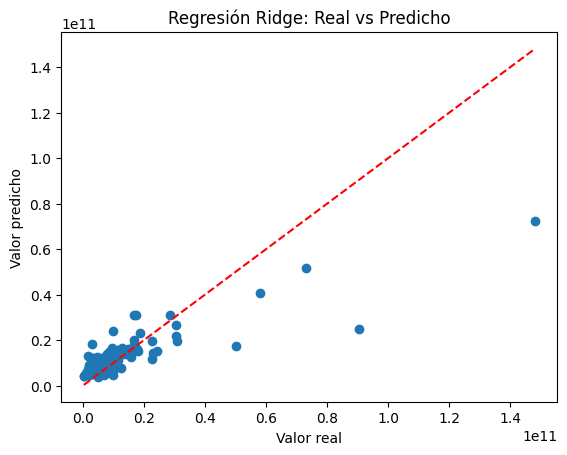

In [ ]:
import matplotlib.pyplot as plt

# Graficar los valores predichos vs los valores reales
plt.scatter(y_test, y_pred_ridge)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valor real')
plt.ylabel('Valor predicho')
plt.title('Regresión Ridge: Real vs Predicho')
plt.show()


# Conclusion final
la optimizacion de los hiperparametros no genero el resultado esperado, no noto diferencia alguna entre el modelo sin optimizacion por hiperparametros y el optimizado. A estas alturas seria mejor usar otro dataset con mayor diversidad de datos.